In [1]:
from pathlib import Path
path = Path('/home/alilavaee/Desktop/plantifydr/TransferLearning')

In [2]:
from fastai.vision.all import *

In [3]:
path.ls()

(#3) [Path('/home/alilavaee/Desktop/plantifydr/TransferLearning/plant_leaf.pth'),Path('/home/alilavaee/Desktop/plantifydr/TransferLearning/train'),Path('/home/alilavaee/Desktop/plantifydr/TransferLearning/models')]

In [4]:
batch_tfms=[*aug_transforms(),Normalize.from_stats(*imagenet_stats)]

In [5]:
dls = ImageDataLoaders.from_folder(path,train='train',valid_pct=0.2,seed=1000,item_tfms=
                                   Resize(224),batch_tfms=batch_tfms,bs=64)

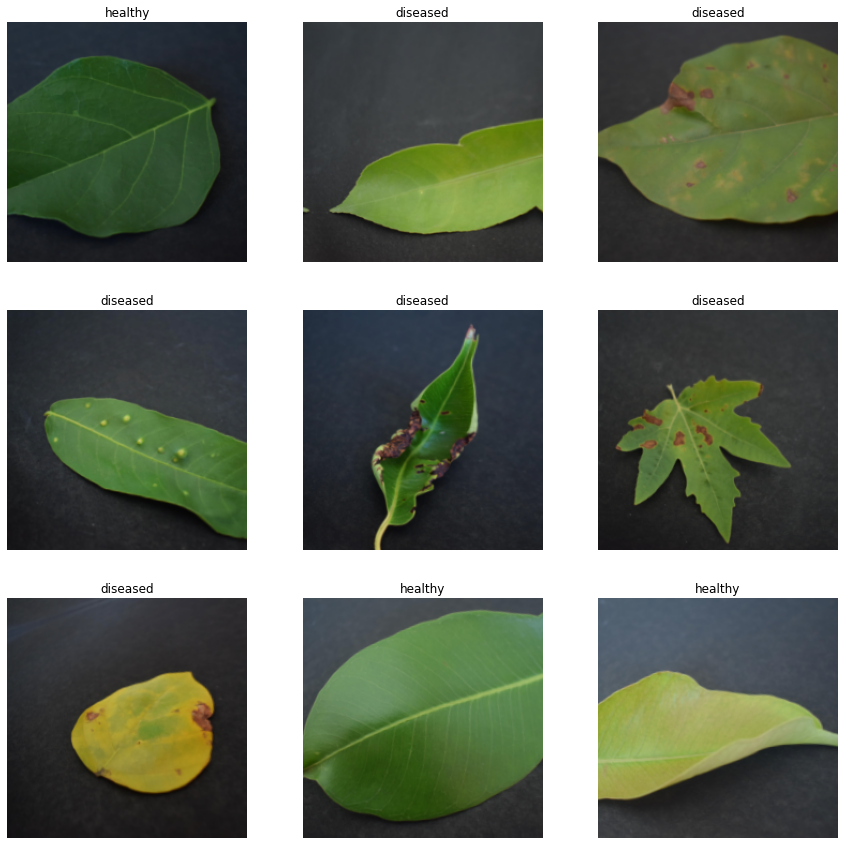

In [6]:
dls.show_batch(figsize=(15,15))

In [6]:
f1 = F1Score(average='weighted')

In [7]:
learn = cnn_learner(dls, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1],
                    cbs=[SaveModelCallback(monitor='accuracy'),
                         EarlyStoppingCallback(monitor='accuracy',patience=2)],
                    model_dir=path/'models')

In [9]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.711433,0.451890,0.908889,0.908816,03:28
1,0.616054,0.453577,0.904444,0.904395,03:30
2,0.487109,0.339544,0.942222,0.942238,03:47
3,0.390296,0.296243,0.951111,0.951020,03:46
4,0.335684,0.287397,0.962222,0.962152,03:46
5,0.308382,0.276273,0.964444,0.964453,03:46
6,0.295637,0.263404,0.978889,0.978879,03:47
7,0.284974,0.262388,0.972222,0.972213,03:47
8,0.275078,0.260179,0.976667,0.976666,03:46


Better model found at epoch 0 with accuracy value: 0.9088888764381409.
Better model found at epoch 2 with accuracy value: 0.9422222375869751.
Better model found at epoch 3 with accuracy value: 0.9511111378669739.
Better model found at epoch 4 with accuracy value: 0.9622222185134888.
Better model found at epoch 5 with accuracy value: 0.9644444584846497.
Better model found at epoch 6 with accuracy value: 0.9788888692855835.
No improvement since epoch 6: early stopping


In [10]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.288391,0.292529,0.962222,0.962192,03:47


Better model found at epoch 0 with accuracy value: 0.9622222185134888.


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.283098,0.250157,0.974444,0.974447,03:47
1,0.270700,0.252147,0.975556,0.975551,03:48
2,0.255825,0.241763,0.981111,0.981102,03:47
3,0.241504,0.233156,0.978889,0.978892,03:46
4,0.229800,0.230050,0.984444,0.984443,03:47


Better model found at epoch 0 with accuracy value: 0.9744444489479065.
Better model found at epoch 1 with accuracy value: 0.9755555391311646.
Better model found at epoch 2 with accuracy value: 0.9811111092567444.
Better model found at epoch 4 with accuracy value: 0.9844444394111633.


In [11]:
learn.save(path/'plant_leaf')

Path('/home/alilavaee/Desktop/plantifydr/TransferLearning/plant_leaf.pth')